# Weather-prediction

• Weather Forecasting is the process of making predictions of the future, based on past and present data of the weather.

•I have tried to predict the weather ‘_tempm’ 

• Used ARIMA model(Auto Regressive Integrated Moving Average) to analyze and predict the time-series data and i shall also perform rigorous exploratory data analysis and visualizations on the dataset.

• Feature Engineering – selecting required attributes.

• Data cleaning – renaming attributes and filling missing data.

• Check rolling mean and standard deviation (graph must not vary too much for stationarity).

• Perform Augmented Dickey–Fuller test (to check for stationarity)

• plotting PACF(partial auto correlation function) and ACF(auto correlation function) to find p and q values of ARIMA model.

• Fitting and forecasting the model for temperature data.

-Project by Monika Kunwar
-Mail Id:monik.kunwar21@gmail.com


In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime
from pandas import Series

%matplotlib inline

In [2]:
# Importing Data
data = pd.read_csv('Desktop/dataset/Weather_data.csv',parse_dates=['datetime_utc'], index_col='datetime_utc')

In [3]:
#Printing the attributes
print(data.info(verbose='True'))#verbose :Whether to print the full summary

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 98913 entries, 1996-11-01 11:00:00 to 2016-11-30 21:00:00
Data columns (total 19 columns):
_conds          98845 non-null object
 _dewptm        98294 non-null float64
 _fog           98913 non-null int64
 _hail          98913 non-null int64
 _heatindexm    29111 non-null float64
 _hum           98160 non-null float64
 _precipm       0 non-null float64
 _pressurem     98682 non-null float64
 _rain          98913 non-null int64
 _snow          98913 non-null int64
_tempm          98244 non-null float64
 _thunder       98913 non-null int64
 _tornado       98913 non-null int64
 _vism          94497 non-null float64
 _wdird         84533 non-null float64
 _wdire         84533 non-null object
 _wgustm        1063 non-null float64
 _windchillm    573 non-null float64
 _wspdm         96560 non-null float64
dtypes: float64(11), int64(6), object(2)
memory usage: 15.1+ MB
None


In [4]:
#printing target 
print( data.columns[10])

_tempm


In [5]:
#Total no of records
print(data.shape)

(98913, 19)


In [6]:
#header of the data set
print(data.columns)

Index(['_conds', ' _dewptm', ' _fog', ' _hail', ' _heatindexm', ' _hum',
       ' _precipm', ' _pressurem', ' _rain', ' _snow', '_tempm', ' _thunder',
       ' _tornado', ' _vism', ' _wdird', ' _wdire', ' _wgustm', ' _windchillm',
       ' _wspdm'],
      dtype='object')


In [7]:
#first 10 records
print(data.head(10))

                    _conds   _dewptm   _fog   _hail   _heatindexm   _hum  \
datetime_utc                                                               
1996-11-01 11:00:00  Smoke       9.0      0       0           NaN   27.0   
1996-11-01 12:00:00  Smoke      10.0      0       0           NaN   32.0   
1996-11-01 13:00:00  Smoke      11.0      0       0           NaN   44.0   
1996-11-01 14:00:00  Smoke      10.0      0       0           NaN   41.0   
1996-11-01 16:00:00  Smoke      11.0      0       0           NaN   47.0   
1996-11-01 17:00:00  Smoke      12.0      0       0           NaN   56.0   
1996-11-01 18:00:00  Smoke      13.0      0       0           NaN   60.0   
1996-11-01 19:00:00  Smoke      13.0      0       0           NaN   60.0   
1996-11-01 20:00:00  Smoke      13.0      0       0           NaN   68.0   
1996-11-01 21:00:00  Smoke      13.0      0       0           NaN   68.0   

                      _precipm   _pressurem   _rain   _snow  _tempm  \
datetime_utc    

In [8]:
#last 10 records
print(data.tail(10))

                             _conds   _dewptm   _fog   _hail   _heatindexm  \
datetime_utc                                                                 
2016-11-30 10:00:00           Smoke      17.0      0       0           NaN   
2016-11-30 10:30:00            Haze      17.0      0       0           NaN   
2016-11-30 11:00:00            Haze      17.0      0       0           NaN   
2016-11-30 11:30:00            Haze      18.0      0       0           NaN   
2016-11-30 12:00:00            Haze      18.0      0       0           NaN   
2016-11-30 12:30:00            Mist      17.0      0       0           NaN   
2016-11-30 13:00:00            Mist      16.0      0       0           NaN   
2016-11-30 15:00:00  Patches of Fog      16.0      1       0           NaN   
2016-11-30 18:00:00  Patches of Fog      14.0      1       0           NaN   
2016-11-30 21:00:00            Mist      13.0      0       0           NaN   

                      _hum   _precipm   _pressurem   _rain   _s

C:\Users\Monika\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


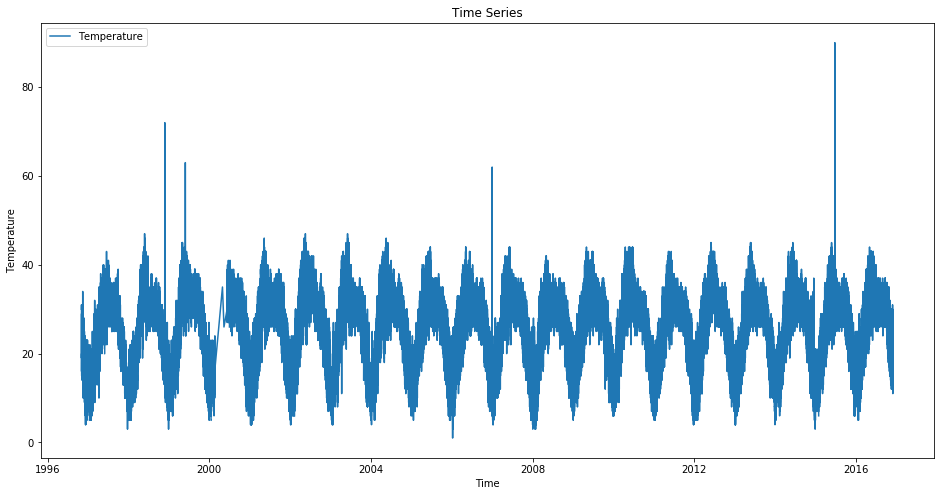

In [9]:
ts =data['_tempm'] 
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Temperature') 
plt.title('Time Series') 
plt.xlabel("Time") 
plt.ylabel("Temperature") 
plt.legend(loc='best')

In [10]:
#selecting columns important for time series prediction and renaming them(feature engineering)

data = data.loc[:,['_conds', ' _hum', '_tempm']]
data = data.rename(columns={'_conds': 'condition', ' _hum': 'humidity', ' _pressurem': 'pressure', '_tempm': 'temprature'})
print(f'dataset shape (rows, columns) - {data.shape}')
data.index = pd.to_datetime(data.index)

dataset shape (rows, columns) - (98913, 3)


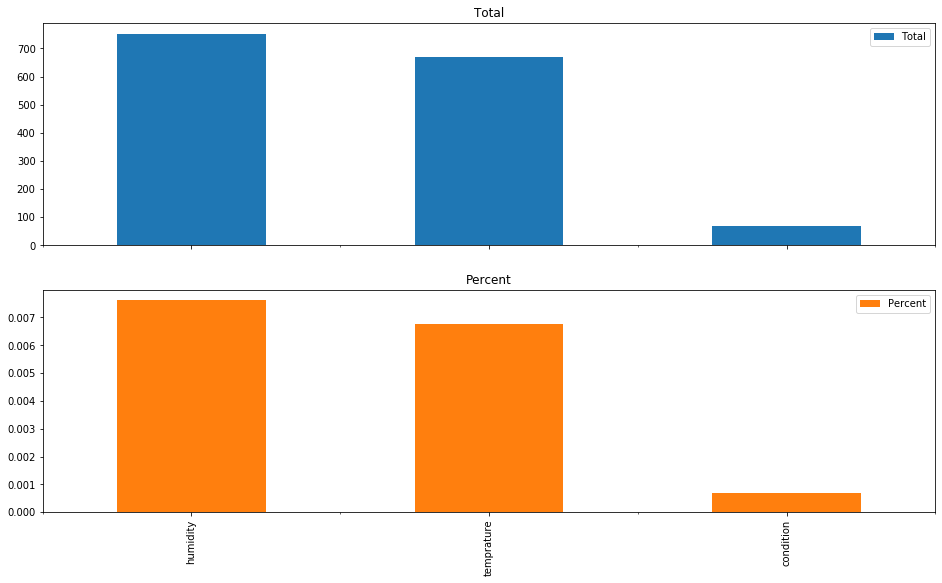

In [11]:
def list_and_visualize_missing_data(dataset):
    # Listing total null items and its percent with respect to all nulls
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = ((dataset.isnull().sum())/(dataset.isnull().count())).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    missing_data = missing_data[missing_data.Total > 0]
    
    missing_data.plot.bar(subplots=True, figsize=(16,9))

list_and_visualize_missing_data(data)

In [12]:
# will fill with previous valid value
data.ffill(inplace=True)
data[data.isnull()].count()

condition     0
humidity      0
temprature    0
dtype: int64

In [13]:
data

,condition,humidity,temprature
datetime_utc,,,
1996-11-01 11:00:00,Smoke,27.0,30.0
1996-11-01 12:00:00,Smoke,32.0,28.0
1996-11-01 13:00:00,Smoke,44.0,24.0
1996-11-01 14:00:00,Smoke,41.0,24.0
1996-11-01 16:00:00,Smoke,47.0,23.0
...,...,...,...
2016-11-30 12:30:00,Mist,78.0,21.0
2016-11-30 13:00:00,Mist,83.0,19.0
2016-11-30 15:00:00,Patches of Fog,90.0,17.0


Text(0, 0.5, 'Percent')

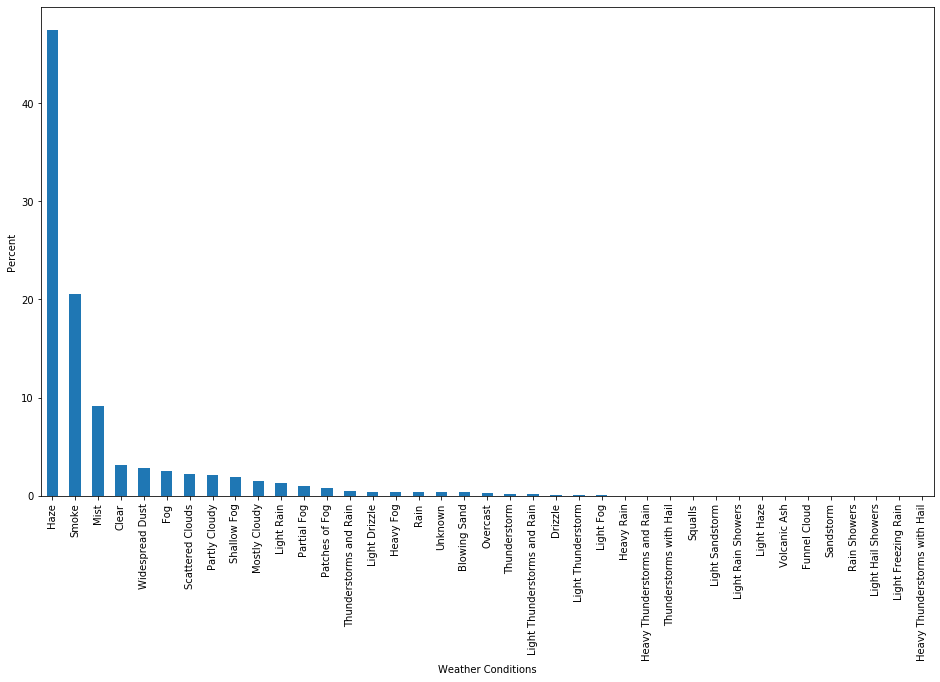

In [14]:
weather_condition = (data.condition.value_counts()/(data.condition.value_counts().sum()))*100
weather_condition.plot.bar(figsize=(16,9))
plt.xlabel('Weather Conditions')
plt.ylabel('Percent')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000000012ADEB00>,
      dtype=object)

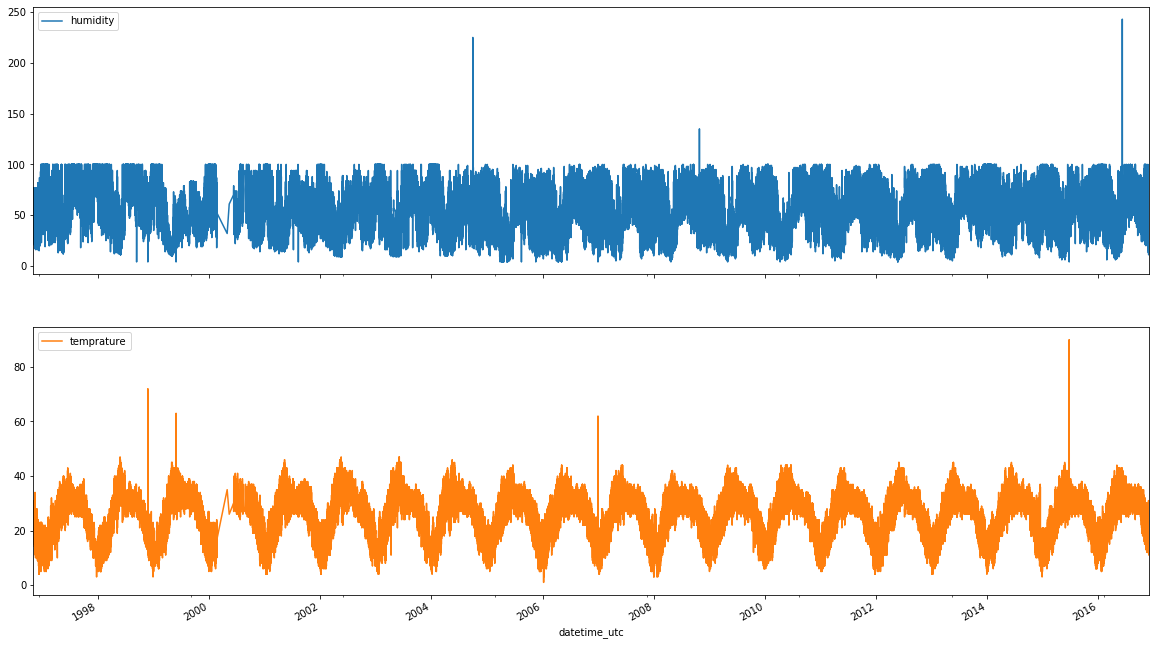

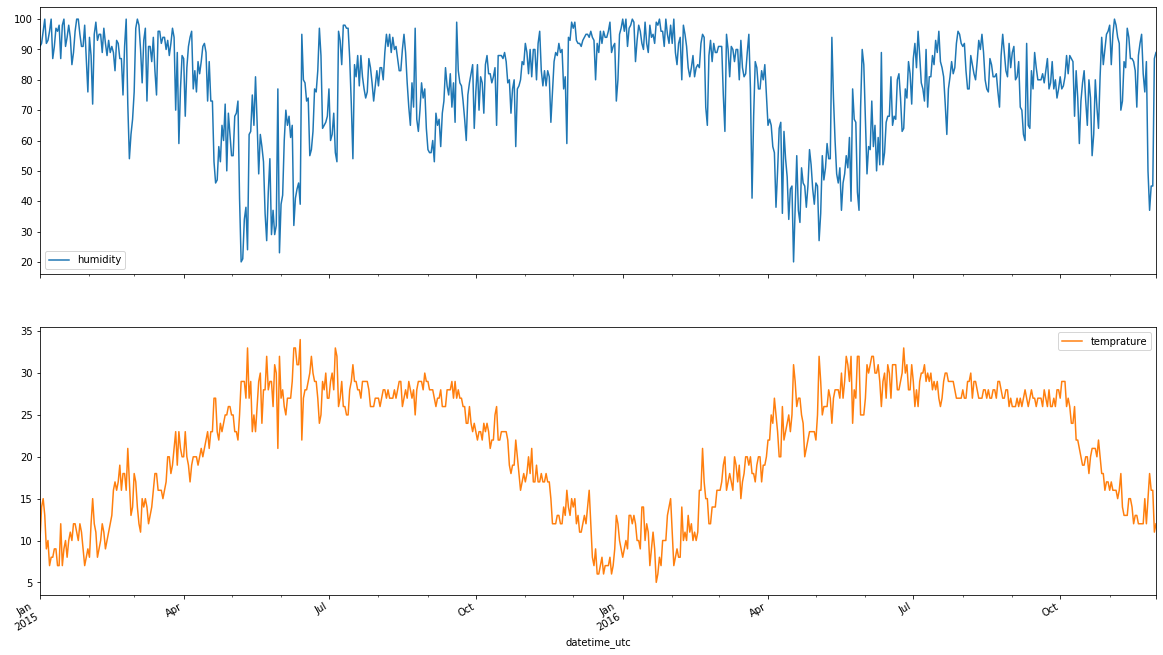

In [15]:
#humidity and temperature graphs
data.plot(subplots=True, figsize=(20,12))
data['2015':'2016'].resample('D').fillna(method='pad').plot(subplots=True, figsize=(20,12))

In [16]:
#removing outliers as max temperature is 90 and max humidity is 243
data = data[data.temprature < 50]
data = data[data.humidity <= 100]


data.describe()

,humidity,temprature
count,98906.000000,98906.000000
mean,57.821356,25.562696
std,23.752494,8.465150
min,4.000000,1.000000
25%,39.000000,19.000000
50%,58.000000,27.000000
75%,78.000000,32.000000
max,100.000000,47.000000


In [17]:
#splitting data into training and test data

train_df = data['2000':'2015'].resample('M').mean().fillna(method='pad')
train_df.drop(columns='humidity', axis=1, inplace=True)
test_df = data['2016':'2017'].resample('M').mean().fillna(method='pad')
test_df.drop(columns='humidity', axis=1, inplace=True)

In [18]:
# check rolling mean and rolling standard deviation
def plot_rolling_mean_std(ts):
    rolling_mean = ts.rolling(12).mean()
    rolling_std = ts.rolling(12).std()
    plt.figure(figsize=(22,10))

    plt.plot(ts, label='Actual Mean')
    plt.plot(rolling_mean, label='Rolling Mean')
    plt.plot(rolling_std, label = 'Rolling Std')
    plt.xlabel("Date")
    plt.ylabel("Mean Temperature")
    plt.title('Rolling Mean & Rolling Standard Deviation')
    plt.legend()
    plt.show()

In [19]:
# Augmented Dickey–Fuller test
plt.style.use('fivethirtyeight')

import seaborn as sns # for plot visualization
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def perform_dickey_fuller_test(ts):
    result = adfuller(ts, autolag='AIC')
    print('Test statistic: ' , result[0])
    print('Critical Values:' ,result[4])

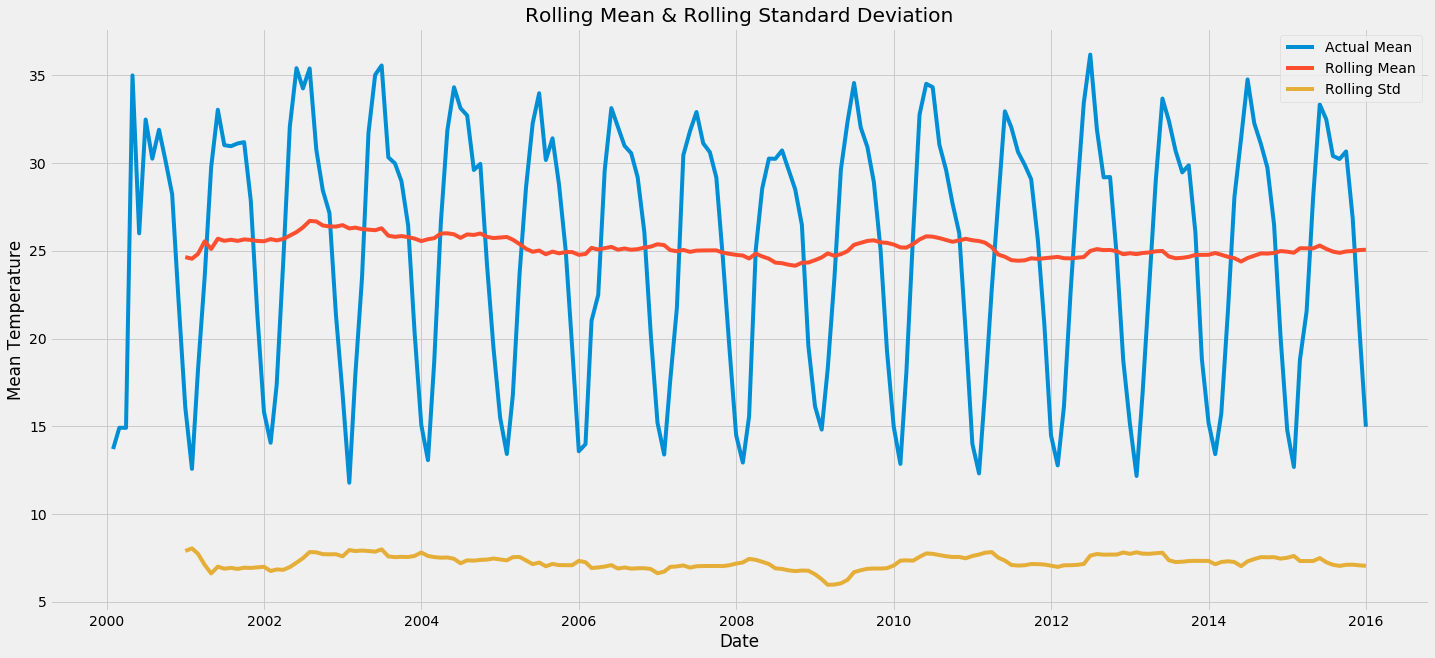

Test statistic:  -2.12699525029802
Critical Values: {'1%': -3.4674201432469816, '5%': -2.877826051844538, '10%': -2.575452082332012}


In [20]:
# check stationary: mean, variance(std)and adfuller test
plot_rolling_mean_std(train_df.temprature)
perform_dickey_fuller_test(train_df.temprature) #test statistic must be less than critical values

C:\Users\Monika\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:572: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  FutureWarning


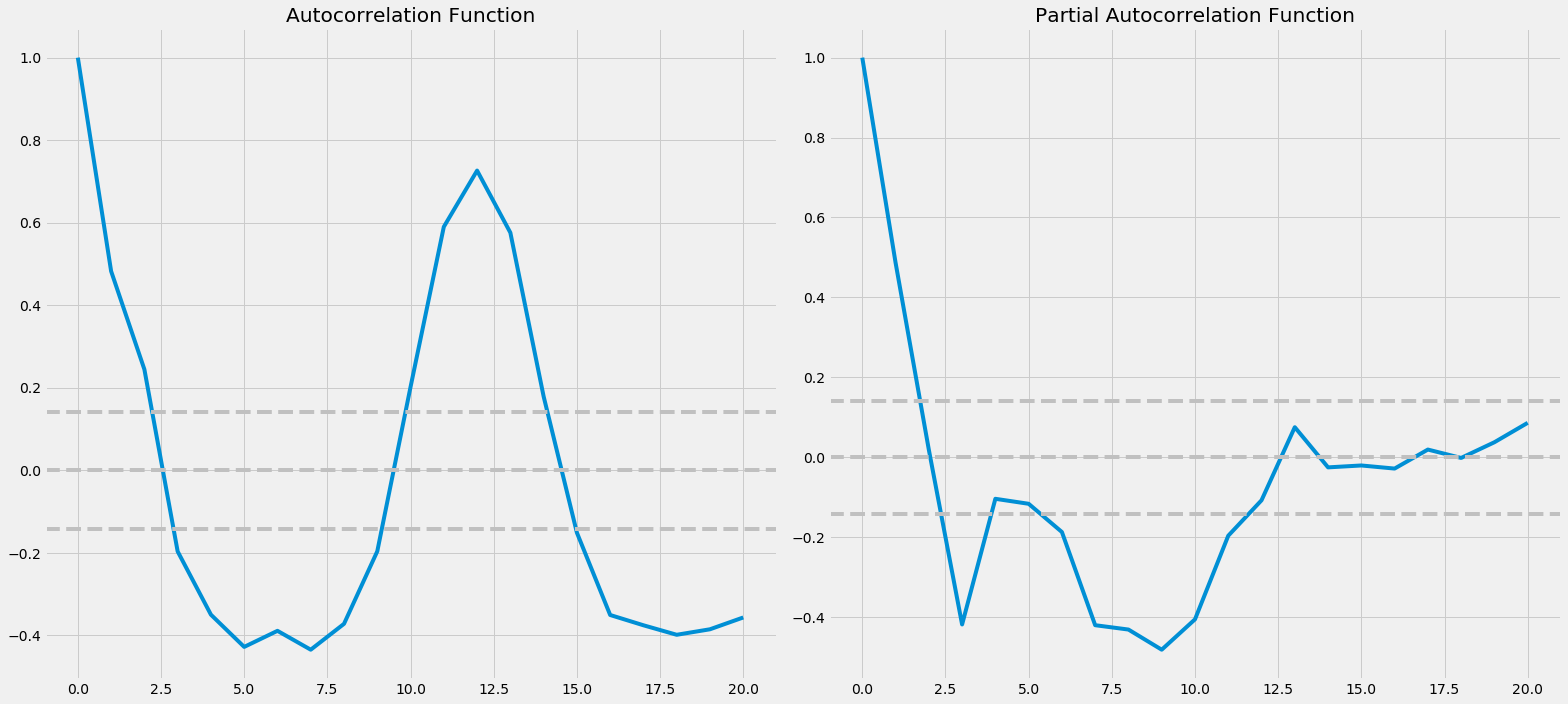

In [21]:
#plotting pacf and acf to find p and q values of ARIMA model

acf_lag = acf(train_df.diff().dropna().values, nlags=20)
pacf_lag = pacf(train_df.diff().dropna().values, nlags=20, method='ols')

plt.figure(figsize=(22,10))

plt.subplot(121)
plt.plot(acf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')#upper confidence level
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')#lower confidence level
plt.title("Autocorrelation Function")

plt.subplot(122)
plt.plot(pacf_lag)
plt.axhline(y=0,linestyle='--',color='silver')
plt.axhline(y=-1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')#upper confidence level
plt.axhline(y=1.96/np.sqrt(len(train_df.diff().values)),linestyle='--',color='silver')#lower confidence level
plt.title("Partial Autocorrelation Function")
plt.tight_layout()

In [22]:
#fitting the ARIMA model p=2,d=0,q=0
model = ARIMA(train_df.values, order=(2,0,2))
model_fit = model.fit()
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  192
Model:                     ARMA(2, 2)   Log Likelihood                -454.355
Method:                       css-mle   S.D. of innovations              2.552
Date:                Thu, 30 Jan 2020   AIC                            920.709
Time:                        09:58:15   BIC                            940.254
Sample:                             0   HQIC                           928.625
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1917      0.119    211.045      0.000      24.958      25.426
ar.L1.y        1.6785      0.024     69.834      0.000       1.631       1.726
ar.L2.y       -0.9519      0.023    -41.164      0.0

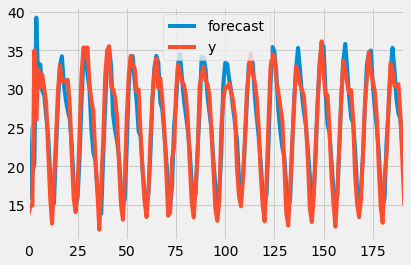

In [23]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

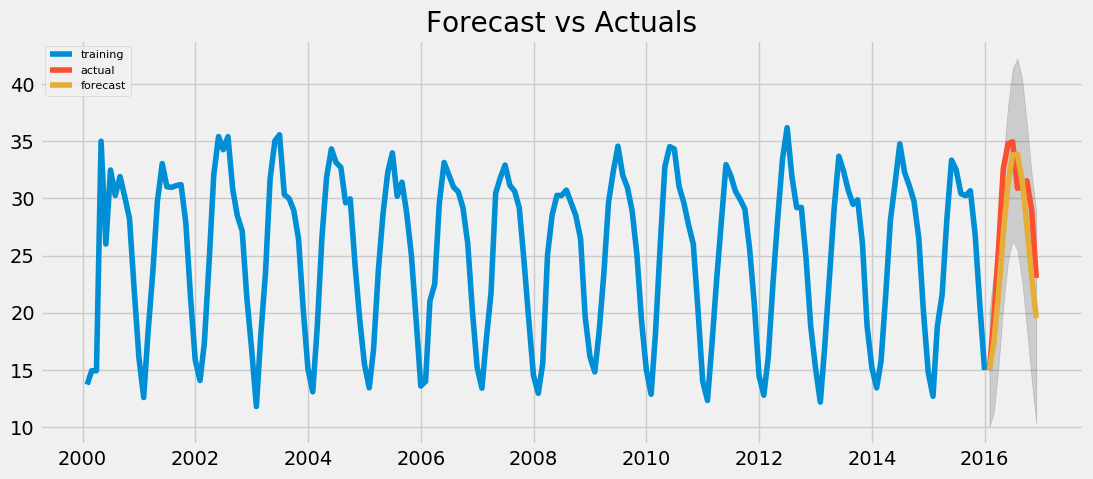

In [24]:
# # Forecast
fc, se, conf = model_fit.forecast(11, alpha=0.05)  # 95% conf

# print(fc)
# Make as pandas series
fc_series = pd.Series(fc, index=test_df.index)
lower_series = pd.Series(conf[:, 0], index=test_df.index)
upper_series = pd.Series(conf[:, 1], index=test_df.index)

# # Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_df, label='training')
plt.plot(test_df, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()